# Reproduce Results

## Import Utils and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Libraries to access the data and save the models
import os
import pickle

In [ ]:
!pip install pyspellchecker
!pip install unidecode
!pip install sentence_transformers
!pip install textstat
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylin

In [ ]:
# Set the HOME environment variable to the desired path
os.environ['HOME'] = '/content/drive/MyDrive/NLP Project'

# Now you can use os.environ['HOME'] to access the new value
home_dir = os.environ['HOME']

#All directories used
models_dir = os.path.join(home_dir, 'models')
datasets_dir=os.path.join(home_dir, 'Datasets')
path_folder_quora=os.path.join(datasets_dir, 'QuoraQuestionPairs')
SimpleSolution_dir= os.path.join(models_dir, 'SimpleSolution')
CleanQuestions_dir=os.path.join(datasets_dir, 'questions')
TFIDF_dir= os.path.join(models_dir, 'TFIDF')
DataframesFeatureExtraction_dir = os.path.join(datasets_dir, 'DataframesFeatureExtraction')
DataframesFeatureDistEmbeddings_dir=os.path.join(datasets_dir, 'DataframesFeatureDistEmbeddings')
Fasttext_unsup_dir= os.path.join(datasets_dir, 'Fasttext_Unsup')
ModelNewFeatures_dir=os.path.join(models_dir, 'ModelNewFeatures')


#Import all libraries, functions and classes needed from utils
exec(open(os.path.join(home_dir, 'utils.py')).read())

[nltk_data] Downloading package punkt to /content/drive/MyDrive/NLP
[nltk_data]     Project/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /content/drive/MyDrive/NLP Project/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read and split the data

In [ ]:
path_folder_quora=home_dir+'/Datasets/QuoraQuestionPairs'
#Read data
train_df = pd.read_csv(os.path.join(path_folder_quora, 'quora_train_data.csv'))
# use this to provide the expected generalization results
test_df = pd.read_csv(os.path.join(path_folder_quora, 'quora_test_data.csv'))

#Split data
A_df, te_df = sklearn.model_selection.train_test_split(train_df,
                                                       test_size=0.05,
                                                       random_state=123)
tr_df, va_df = sklearn.model_selection.train_test_split(A_df,
                                                        test_size=0.05,
                                                        random_state=123)
y_tr = tr_df['is_duplicate'].values
X_tr = tr_df.drop(['is_duplicate'], axis =1)

y_va = va_df['is_duplicate'].values
X_va = va_df.drop(['is_duplicate'], axis =1)

y_te = te_df['is_duplicate'].values
X_te = te_df.drop(['is_duplicate'], axis =1)

print('X_tr.shape=',X_tr.shape)
print('y_tr.shape=',y_tr.shape)
print('X_va.shape=',X_va.shape)
print('y_va.shape=',y_tr.shape)
print('X_te.shape=',X_te.shape)
print('y_tr.shape=',y_tr.shape)

X_tr.shape= (291897, 5)
y_tr.shape= (291897,)
X_va.shape= (15363, 5)
y_va.shape= (291897,)
X_te.shape= (16172, 5)
y_tr.shape= (291897,)


## TFIDF

In [ ]:
total_stats = pd.DataFrame()

Train results

ROC AUC score: 0.8659411164793215


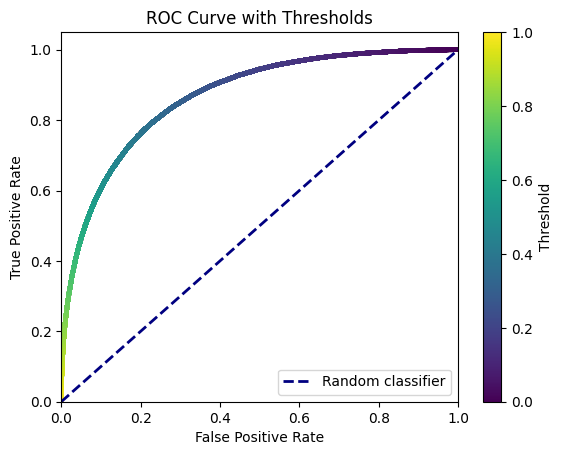

In [ ]:
train_tfidf = pickle.load(open(os.path.join(TFIDF_dir, 'tfidf_train_set.sav'),'rb'))
train_clf = pickle.load(open(os.path.join(TFIDF_dir,'log_train_set.sav'), 'rb'))
y_train = tr_df["is_duplicate"].values

_,_= plot_roc_curve_and_threshold(train_tfidf, y_train, train_clf)

Validation results

ROC AUC score: 0.7633780169308619


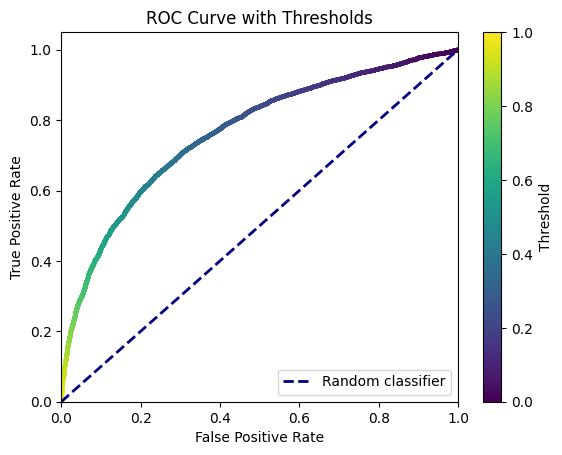

Optimal Threshold: 0.4242541747439607
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      9696
           1       0.61      0.64      0.63      5667

    accuracy                           0.72     15363
   macro avg       0.70      0.70      0.70     15363
weighted avg       0.72      0.72      0.72     15363



In [ ]:
val_tfidf = pickle.load(open(os.path.join(TFIDF_dir, 'tfidf_val_set.sav'),'rb'))
y_val = va_df["is_duplicate"].values
y_score = train_clf.predict_proba(val_tfidf)[:, 1] # Extract probabilities for the positive class

optimal_threshold,_ = plot_roc_curve_and_threshold(val_tfidf, y_val, train_clf, calculate_optimal_threshold=True)

Test results

In [ ]:
test_tfidf = pickle.load(open(os.path.join(TFIDF_dir, 'tfidf_test_set.sav'),'rb'))
trval_clf = pickle.load(open(os.path.join(TFIDF_dir, 'log_train_val_set.sav'), 'rb'))
y_test = te_df["is_duplicate"].values

_,metrics_tfidf = plot_roc_curve_and_threshold(test_tfidf, y_test, trval_clf, optimal_threshold=optimal_threshold, calculate_roc=False)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     10165
           1       0.66      0.62      0.64      6007

    accuracy                           0.74     16172
   macro avg       0.72      0.71      0.72     16172
weighted avg       0.74      0.74      0.74     16172



In [ ]:
total_stats['TFIDF'] = metrics_tfidf
total_stats

,TFIDF
Accuracy,0.737757
Precision,0.718893
Recall,0.713150
F1-score,0.715609


Kaggle predictions

In [ ]:
kaggle_tfidf = pickle.load(open(os.path.join(TFIDF_dir, 'tfidf_kaggle.sav'),'rb'))
final_clf = pickle.load(open(os.path.join(TFIDF_dir, 'log_train_val_test_set.sav'), 'rb'))
y_kaggle = test_df["is_duplicate"].values

_,_ = plot_roc_curve_and_threshold(kaggle_tfidf, y_kaggle, final_clf, optimal_threshold=optimal_threshold, calculate_roc=False)


              precision    recall  f1-score   support

           0       0.78      0.80      0.79     50868
           1       0.64      0.61      0.62     29990

    accuracy                           0.73     80858
   macro avg       0.71      0.70      0.71     80858
weighted avg       0.73      0.73      0.73     80858



## Fast Text

Here we can see the Supervised Fast Text approach.

In [ ]:
#Test
preguntas_test = te_df[['question1', 'question2']].values.tolist()
preguntas_test_2 = questions_fasttext_format(preguntas_test)
label_test = te_df['is_duplicate'].tolist()

Threshold:  0.18618673086166382
AUC: 0.831970


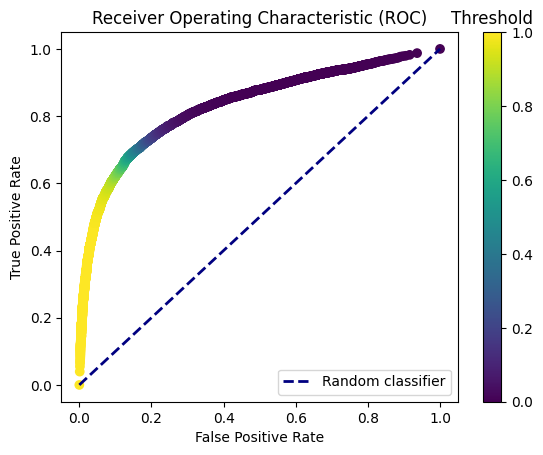

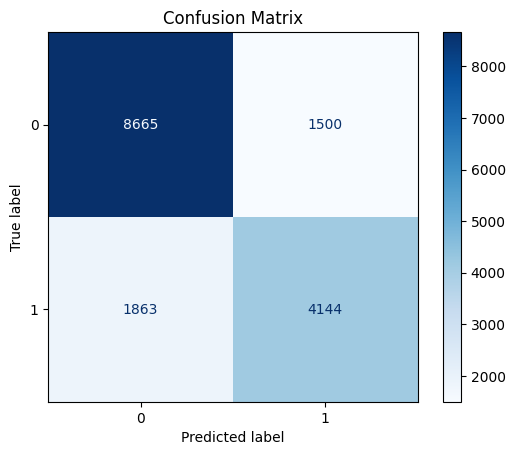

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     10165
           1       0.73      0.69      0.71      6007

    accuracy                           0.79     16172
   macro avg       0.78      0.77      0.77     16172
weighted avg       0.79      0.79      0.79     16172



In [ ]:
#Train
model_1 = fasttext.load_model(os.path.join(home_dir, './models/FastText_Sup/Fast_Text_Supervised.bin'))
predicted_test_1, predicted_prob_1 = predict_fasttext(preguntas_test_2,model_1)
results = get_results(predicted_test_1, predicted_prob_1, label_test)
total_stats['Fast Text Supervised'] = results

Threshold:  0.3613796830177307
AUC: 0.817378


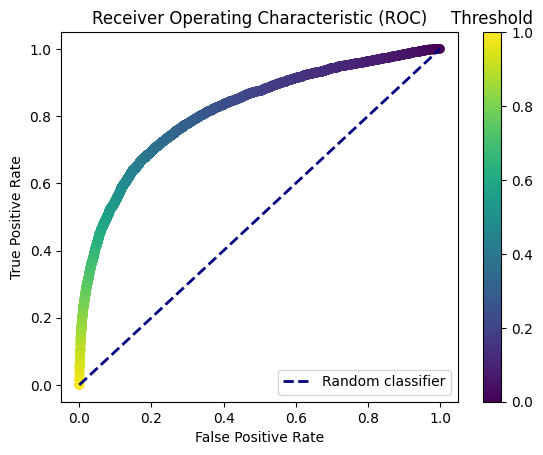

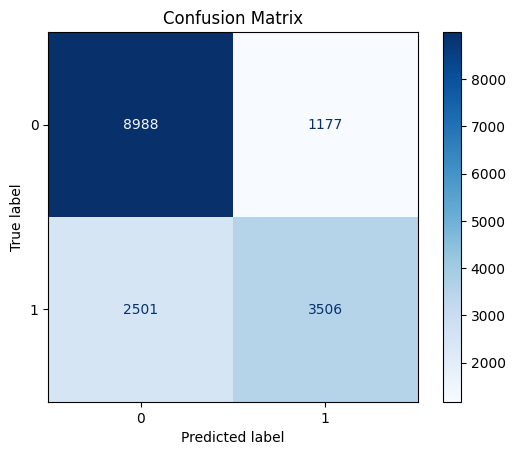

              precision    recall  f1-score   support

           0       0.78      0.88      0.83     10165
           1       0.75      0.58      0.66      6007

    accuracy                           0.77     16172
   macro avg       0.77      0.73      0.74     16172
weighted avg       0.77      0.77      0.77     16172



In [ ]:
#Validation
model_2 = fasttext.load_model(os.path.join(home_dir, './models/FastText_Sup/Fast_Text_Supervised_val.bin'))
predicted_test_2, predicted_prob_2 = predict_fasttext(preguntas_test_2,model_2)
results = get_results(predicted_test_2, predicted_prob_2, label_test)
total_stats['Fast Text Supervised Hyperopt'] = results

## Feature extraction

Here we reproduce the results from classifying the datasets with the extracted features. That is:
- First Word Equal: Checks if the first word in both questions is the same.
- Common Words Ratio: Calculates the ratio of common words between the two questions.
- Flesch Reading Ease (Question 1): Measures the readability of Question 1 using the Flesch Reading Ease formula.
- Flesch Reading Ease (Question 2): Measures the readability of Question 2 using the Flesch Reading Ease formula.
- Flesch Kincaid Grade (Question 1): Assesses the grade level required to understand Question 1 using the Flesch-Kincaid Grade Level formula.
- Flesch Kincaid Grade (Question 2): Assesses the grade level required to understand Question 2 using the Flesch-Kincaid Grade Level formula.
- Cosine distance between embeddings
- Euclidean distance between embeddings
- Manhattan distance between embeddings

We trained a Random Forest and an XGBoost.

Note that the Random forest uses less features, that is because it brought better results than with all of them.

In [ ]:
# Load DataFrames
with open(os.path.join(DataframesFeatureDistEmbeddings_dir, 'X_tr.pkl'), 'rb') as file:
    X_tr = pickle.load(file)

with open(os.path.join(DataframesFeatureDistEmbeddings_dir, 'X_va.pkl'), 'rb') as file:
    X_va = pickle.load(file)

with open(os.path.join(DataframesFeatureDistEmbeddings_dir, 'X_te.pkl'), 'rb') as file:
    X_te = pickle.load(file)

# Load arrays
with open(os.path.join(DataframesFeatureDistEmbeddings_dir, 'y_tr.pkl'), 'rb') as file:
    y_tr = pickle.load(file)

with open(os.path.join(DataframesFeatureDistEmbeddings_dir, 'y_va.pkl'), 'rb') as file:
    y_va = pickle.load(file)

with open(os.path.join(DataframesFeatureDistEmbeddings_dir, 'y_te.pkl'), 'rb') as file:
    y_te = pickle.load(file)

# Load Random Forest model
with open(os.path.join(ModelNewFeatures_dir, 'rf_model.pkl'), 'rb') as file:
    rf_model = pickle.load(file)

# Load XGBoost model
with open(os.path.join(ModelNewFeatures_dir, 'xgb_model.pkl'), 'rb') as file:
    xgb_model = pickle.load(file)

Threshold:  0.44148245
AUC: 0.802454


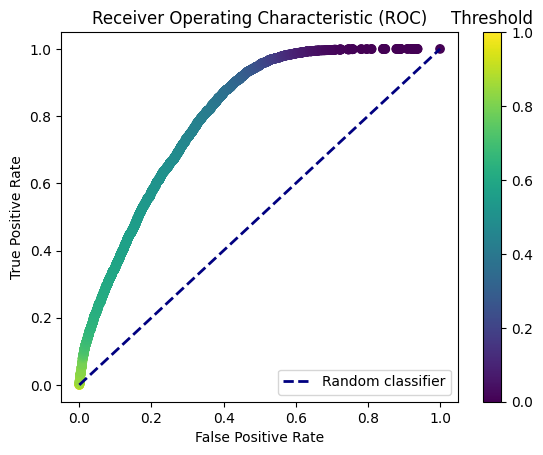

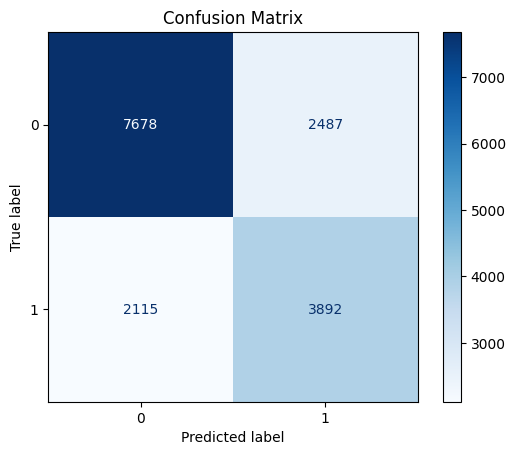

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     10165
           1       0.61      0.65      0.63      6007

    accuracy                           0.72     16172
   macro avg       0.70      0.70      0.70     16172
weighted avg       0.72      0.72      0.72     16172



In [ ]:
results=print_results(xgb_model,X_te.drop(['id','qid1','qid2'], axis = 1),y_te)
total_stats['XGBoost Feature Extraction'] = results

Threshold:  0.4723181336405059
AUC: 0.775793


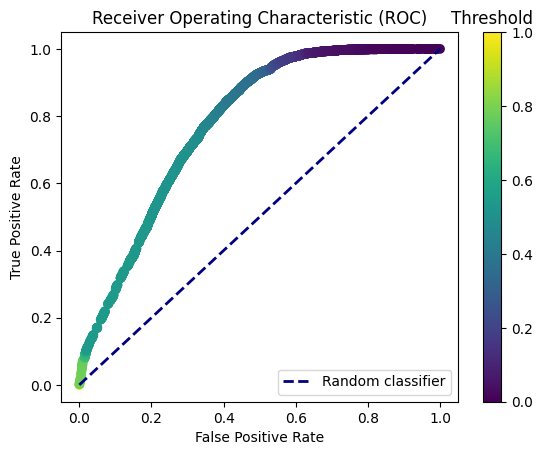

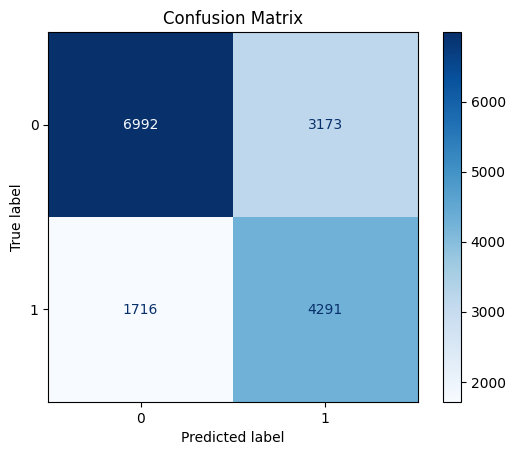

              precision    recall  f1-score   support

           0       0.80      0.69      0.74     10165
           1       0.57      0.71      0.64      6007

    accuracy                           0.70     16172
   macro avg       0.69      0.70      0.69     16172
weighted avg       0.72      0.70      0.70     16172



In [ ]:
results=print_results(rf_model,X_te.drop(['id','qid1','qid2','first_word_equal', 'flesch_kincaid_grade_q1', 'flesch_kincaid_grade_q2','manhattan_distance','euclidean_distance'], axis = 1),y_te)
total_stats['RF Feature Extraction'] = results

# Sentence Transformers

In this section, we are going to test the trained models on train_models.ipynb on the test dataset, and then to compare them.

## MiniLM

Now, we load the MiniLM model and all its variants, so that we will get to know which parameters are better to approach our problem.

### With contrastive loss

Results for the baseline model with margin $m=0.5$ and Contrastive Loss

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


-------------Validation set-----------------------
Threshold:  0.81234854
AUC: 0.866276


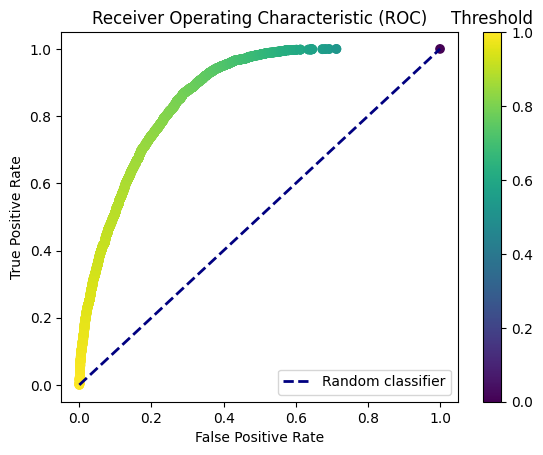

-------------Test set-----------------------


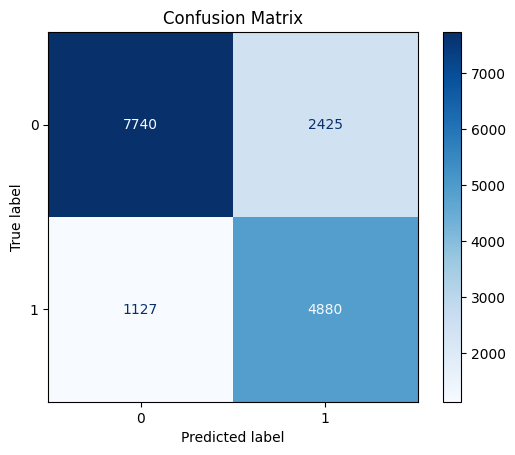

              precision    recall  f1-score   support

           0       0.87      0.76      0.81     10165
           1       0.67      0.81      0.73      6007

    accuracy                           0.78     16172
   macro avg       0.77      0.79      0.77     16172
weighted avg       0.80      0.78      0.78     16172



In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
print ('-------------Validation set-----------------------')
_,threshold,_ = predict (model, va_df, show_roc=True, print_cm=False)
print ('-------------Test set-----------------------')
predictions, _, results = predict (model, te_df, threshold = threshold)
total_stats['MiniLM-Baseline'] = results

Results for the pretrained model with margin $m=0.5$ and Contrastive loss

-------------Validation set-----------------------
Threshold:  0.8338425
AUC: 0.954081


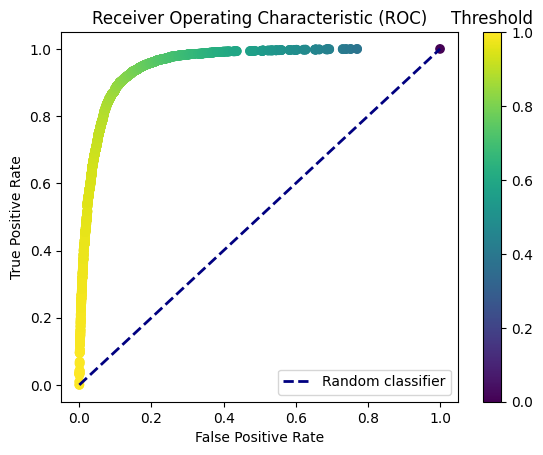

-------------Test set-----------------------


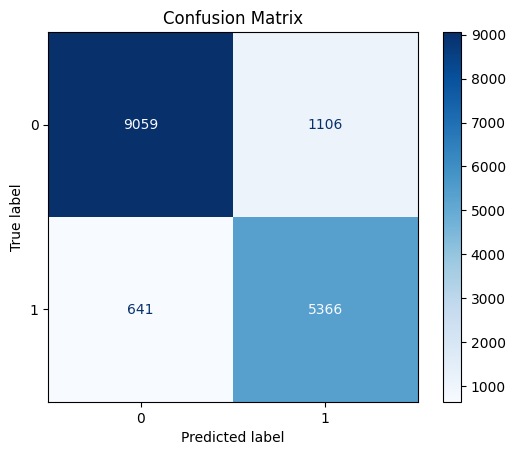

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10165
           1       0.83      0.89      0.86      6007

    accuracy                           0.89     16172
   macro avg       0.88      0.89      0.89     16172
weighted avg       0.89      0.89      0.89     16172



In [ ]:
model = SentenceTransformer((os.path.join(home_dir, './models/MiniLM-05')))
print ('-------------Validation set-----------------------')
_,threshold,_ = predict (model, va_df, show_roc=True, print_cm=False)
print ('-------------Test set-----------------------')
predictions, _, results = predict (model, te_df, threshold = threshold)
total_stats['MiniLM-05'] = results

Results for the model with margin $m=0.3$ and Contrastive loss

-------------Validation set-----------------------
Threshold:  0.88753027
AUC: 0.954120


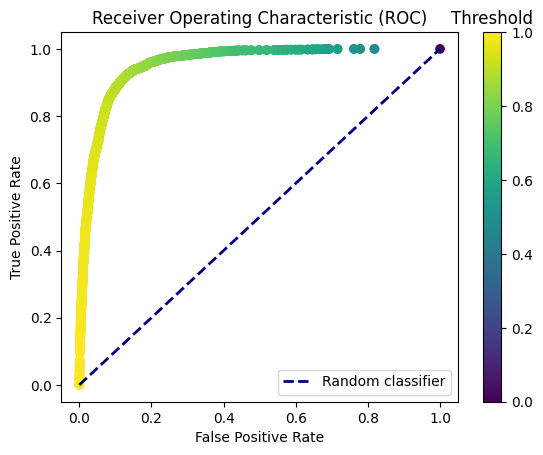

-------------Test set-----------------------


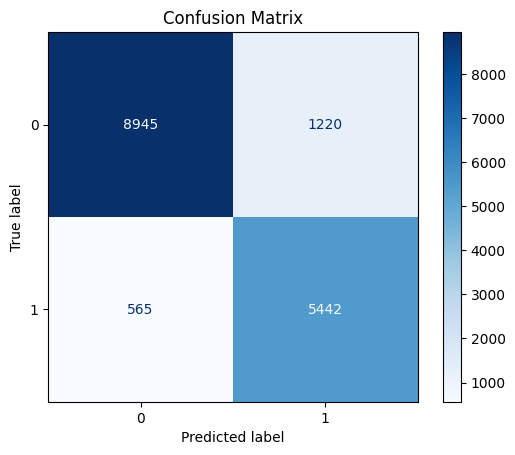

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10165
           1       0.82      0.91      0.86      6007

    accuracy                           0.89     16172
   macro avg       0.88      0.89      0.88     16172
weighted avg       0.89      0.89      0.89     16172



In [ ]:
model = SentenceTransformer((os.path.join(home_dir, './models/MiniLM-03')))
print ('-------------Validation set-----------------------')
_,threshold,_ = predict (model, va_df, show_roc=True, print_cm=False)
print ('-------------Test set-----------------------')
predictions, _, results = predict (model, te_df, threshold = threshold)
total_stats['MiniLM-03'] = results

### With Online Contrastive Loss

Results for the model with margin $m=0.5$ and Online Contrastive loss

-------------Validation set-----------------------
Threshold:  0.8451139
AUC: 0.954389


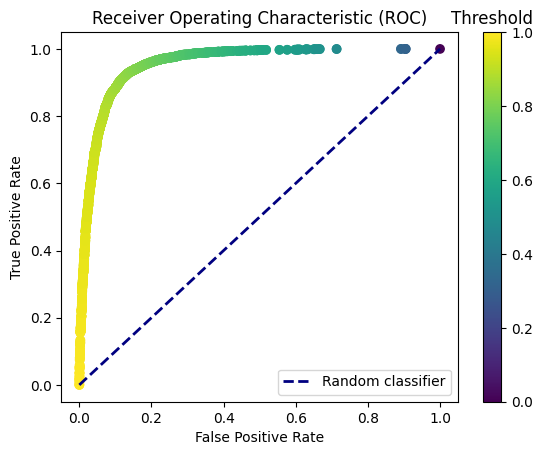

-------------Test set-----------------------


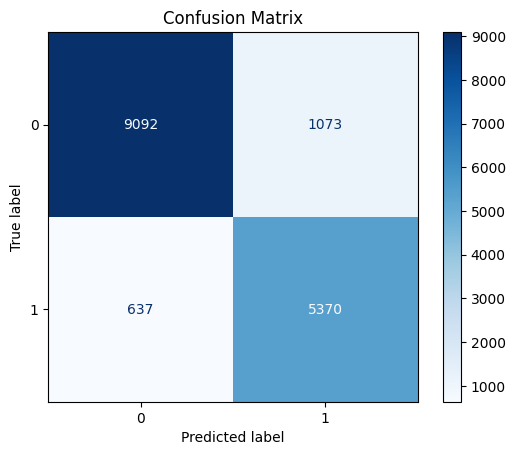

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10165
           1       0.83      0.89      0.86      6007

    accuracy                           0.89     16172
   macro avg       0.88      0.89      0.89     16172
weighted avg       0.90      0.89      0.89     16172



In [ ]:
model = SentenceTransformer((os.path.join(home_dir, './models/MiniLM-05-Online')))
print ('-------------Validation set-----------------------')
_,threshold,_ = predict (model, va_df, show_roc=True, print_cm=False)
print ('-------------Test set-----------------------')
predictions, _, results = predict (model, te_df, threshold = threshold)
total_stats['MiniLM-05-Online'] = results

Results for the model with margin $m=0.3$ and Online Contrastive loss

-------------Validation set-----------------------
Threshold:  0.89640135
AUC: 0.955207


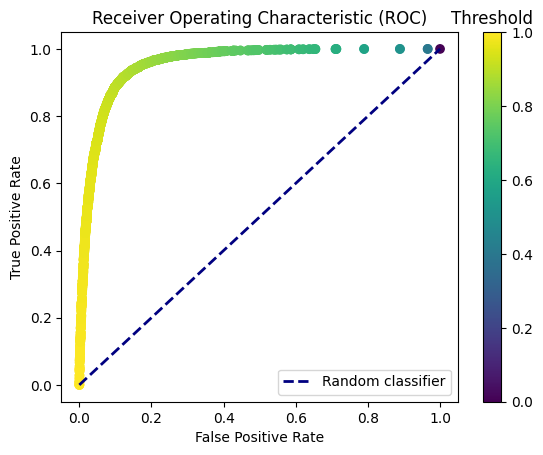

-------------Test set-----------------------


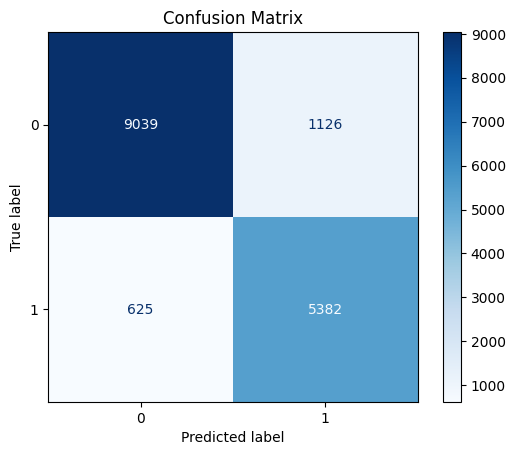

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     10165
           1       0.83      0.90      0.86      6007

    accuracy                           0.89     16172
   macro avg       0.88      0.89      0.89     16172
weighted avg       0.90      0.89      0.89     16172



In [ ]:
model = SentenceTransformer((os.path.join(home_dir, './models/MiniLM-03-Online')))
print ('-------------Validation set-----------------------')
_,threshold,_ = predict (model, va_df, show_roc=True, print_cm=False)
print ('-------------Test set-----------------------')
predictions, _, results = predict (model, te_df, threshold = threshold)
total_stats['MiniLM-03-Online'] = results

## Distilbert Quora

As we mentioned in the train_models notebook, we found a pretrained Sentence Transformers model, that is a Distilbert model pretrained with a quora dataset. Let us show the model performance without fine tuning it. It maps sentences & paragraphs to a 768 dimensional dense vector space

-------------Validation set-----------------------
Threshold:  0.8696514
AUC: 0.960451


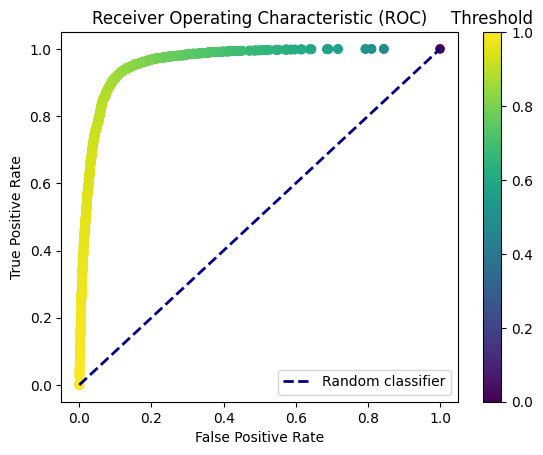

-------------Test set-----------------------


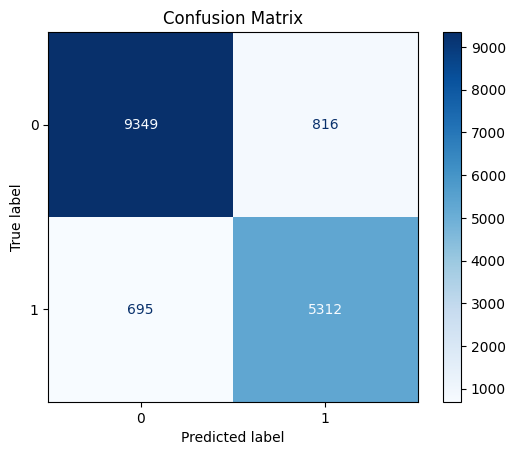

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10165
           1       0.87      0.88      0.88      6007

    accuracy                           0.91     16172
   macro avg       0.90      0.90      0.90     16172
weighted avg       0.91      0.91      0.91     16172



In [ ]:
model = SentenceTransformer("sentence-transformers/quora-distilbert-base")
print ('-------------Validation set-----------------------')
_,threshold,_ = predict (model, va_df, show_roc=True, print_cm=False)
print ('-------------Test set-----------------------')
predictions, _, results = predict (model, te_df, threshold = threshold)
total_stats['Distilbert-Base'] = results

Note that since we could not store the fine tuning results, we can not show the results of the fit. However, the results would not be much better than the base model, since the model is also pretrained on a Quora Dataset.

The conclusions of the Sentence Transformers models are explained below, so we can compare them to other approaches.

## Result visualization

In [ ]:
total_stats

,TFIDF,Fast Text Supervised,Fast Text Supervised Hyperopt,XGBoost Feature Extraction,RF Feature Extraction,MiniLM-Baseline,MiniLM-05,MiniLM-03,MiniLM-05-Online,MiniLM-03-Online,Distilbert-Base
Accuracy,0.737757,0.792048,0.772570,0.715434,0.697687,0.780361,0.891974,0.889624,0.894262,0.891726,0.906567
Precision,0.718893,0.790054,0.769815,0.719434,0.718233,0.796804,0.894987,0.894635,0.896986,0.895083,0.907045
Recall,0.713150,0.792048,0.772570,0.715434,0.697687,0.780361,0.891974,0.889624,0.894262,0.891726,0.906567
F1-score,0.715609,0.790632,0.765439,0.717055,0.702367,0.783579,0.892722,0.890640,0.894954,0.892526,0.906753


To conclude, as a first approach we chose to apply TF-IDF, since its easy to implement. We obtained good results but not good enough to be considered a good way to solve the Quora Questions Pairs problem, since we are using a very simple algorithm.

After that, we considered building embeddings for each sentence. That is why we decided to use Fast Text library. First, we decided to use a supervised algorithm that includes text classification. We got better results than TF-IDF. we also tried to optimize its hyperparamters. unfortunately, we could not obtain better performance It may be due to the fact that the model is unbalanced having more examples corresponding with one label than the other. If we had a balanced dataset, the model would be unbiased, so the hyperparameter tuning would have been ore effective.

Then, we decided to add extra features, hoping we get better results. To do so, we used the unsupervised algorithm of Fast Text, building embeddings for the sentences. After that, we computed distance metrics, and adding those extra features we trained two classifiers, Random Forest and XGBoost. Since we are using an unsupervised algorithm and a classifier that is not as synchronized as the supervised method of Fast Text, we could not either improve any evaluation metric shown above.

Finally, we used a more sofisticated group of models, that are Sentence Transformers. These are state of the art neural networks that can perfectly build embeddings for sentences. We tried two models, one more general and a pretrained on a custom dataset.

As we can see, finetuning a model makes it perform better on custom datasets, since for our problem we don not need a model to be as general as possible, but to be able to do correctly a very specific task. One can notice the 10% accuracy increase in all variations we made to de baseline model. With respect to modifying the margin, we could see that there are no big improvements made. If we did not modify the threshold with the validation set, the model with the modified margin would perform better. It is reasonable to think this because the threshold of the model with the modified margin is higher, which means that this model would have better classified the examples with a probability around 0.5 because it would have 'dragged' them towards a distance greater than 0.5 and that if we had considered the predefined margin this would not have happened.

Relative to the choose of the loss, we can see that the Online Contrastive Loss makes the model perform slightly better than with the Contrastive Loss, as one could expect because this loss focuses on hard examples.

Finally, using the Distilbert quora pretrained model without fine-tuning it showed an impressive performance, geting an accuracy greater than 90%. Compared to the MiniLM Baseline model, we can see that the fact that the model is pretrained with a custom Quora Dataset  makes the model perform much better than a general model. It is also relevant that the Distilbert model maps the questions to a higher dimensional space, and also that it is probably trained on a bigger dataset, so it captures better complex relations between sentences or words.